#### COVID-19 in India with Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
plt.style.use('fivethirtyeight')

# Covid-19 Dataset has been sourced from GitHub
# https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv
# https://github.com/datasets/covid-19

In [2]:
covid = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv')
#covid.head()
#covid.shape
#covid.dtypes
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143864 entries, 0 to 143863
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       143864 non-null  object
 1   Country    143864 non-null  object
 2   Confirmed  143864 non-null  int64 
 3   Recovered  143864 non-null  int64 
 4   Deaths     143864 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.5+ MB


In [3]:
# Date is object type, need to conver it to datetime format
import matplotlib.dates as mdates
covid1 = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', 
                     parse_dates = ['Date'])
covid1.dtypes
# covid1.head()

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [4]:
# Sum of total cases -> creating a new column
covid1['Total Confirmed'] = covid1[['Confirmed', 'Recovered', 'Deaths']].sum(axis = 1)
covid1.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Confirmed
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


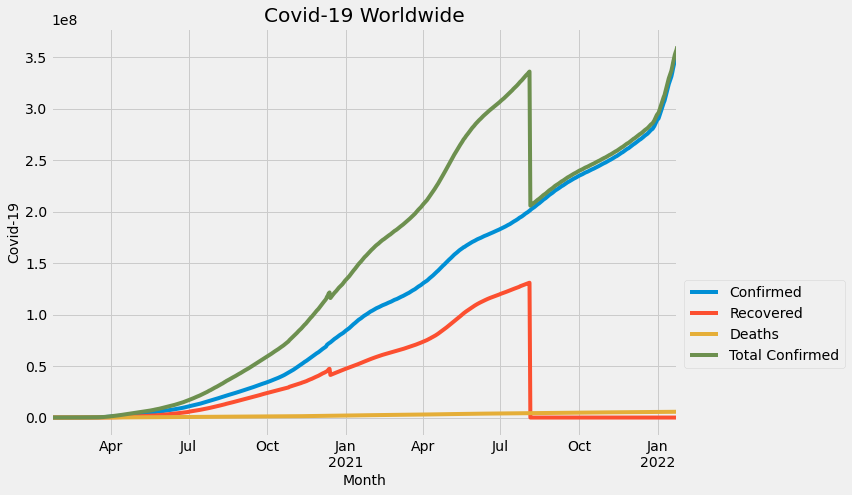

In [5]:
# Plotting for wordlwide cases 
worldwide = covid1.groupby(['Date']).sum()
c = worldwide.plot(figsize = (10, 7))
c.set_xlabel('Month', fontdict = {'fontsize' : 14, 'fontweight' : 1})
c.set_ylabel('Covid-19', fontdict = {'fontsize' : 14, 'fontweight' : 1})
c.title.set_text('Covid-19 Worldwide')

plt.legend(bbox_to_anchor=(1.0, 0.4))
#plt.ticklabel_format(useOffset = False)

plt.show()

In [6]:
India = covid1[covid1['Country'] =='India'].groupby(['Date']).sum()
India.head()

,Confirmed,Recovered,Deaths,Total Confirmed
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0


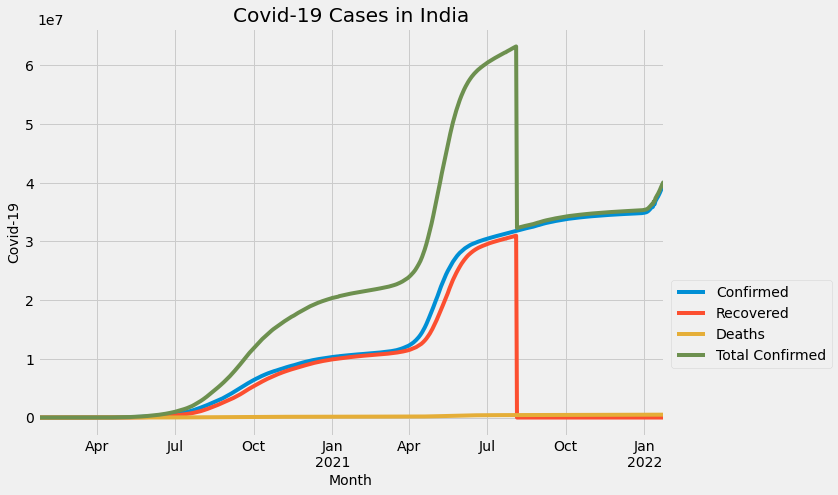

In [7]:
I = India.plot(figsize = (10, 7))
I.set_xlabel('Month', fontdict = {'fontsize' : 14, 'fontweight' : 1})
I.set_ylabel('Covid-19', fontdict = {'fontsize' : 14, 'fontweight' : 1})
I.title.set_text('Covid-19 Cases in India')

plt.legend(bbox_to_anchor=(1.0, 0.4))

plt.show()

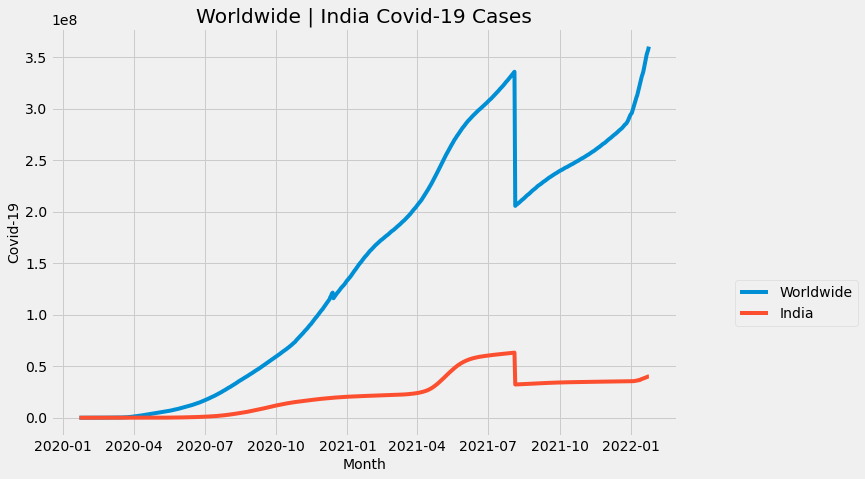

In [8]:
fig = figure(figsize = (10, 7))
ax = fig.add_subplot(111)

ax.plot(worldwide[['Total Confirmed']], label = 'Worldwide')
ax.plot(India[['Total Confirmed']], label = 'India')
ax.set_xlabel('Month', fontdict = {'fontsize' : 14, 'fontweight' : 1})
ax.set_ylabel('Covid-19', fontdict = {'fontsize' : 14, 'fontweight' : 1})
ax.title.set_text('Worldwide | India Covid-19 Cases')

plt.legend()

plt.legend(bbox_to_anchor=(1.3, 0.4))

plt.show()

In [9]:
USA = covid1[covid1['Country'] =='US'].groupby(['Date']).sum()
Brazil = covid1[covid1['Country'] =='Brazil'].groupby(['Date']).sum()

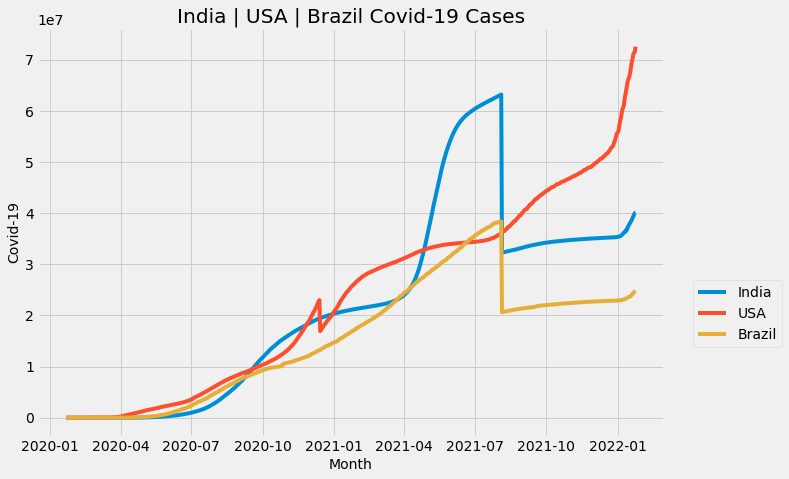

In [10]:
fig = figure(figsize = (10, 7))
ax = fig.add_subplot(111)

# ax.plot(worldwide[['Total Confirmed']], label = 'Worldwide')
ax.plot(India[['Total Confirmed']], label = 'India')
ax.plot(USA[['Total Confirmed']], label = 'USA')
ax.plot(Brazil[['Total Confirmed']], label = 'Brazil')
ax.set_xlabel('Month', fontdict = {'fontsize' : 14, 'fontweight' : 1})
ax.set_ylabel('Covid-19', fontdict = {'fontsize' : 14, 'fontweight' : 1})
ax.title.set_text('India | USA | Brazil Covid-19 Cases')

plt.legend()

plt.legend(bbox_to_anchor=(1.2, 0.4))

plt.show()

In [11]:
# Thank You :) 